# Initializing block - imports, constants, config

In [54]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import plotly.express as px
import plotly
import matplotlib.pylab as plt

DATA_DIR = "data"

plotly.offline.init_notebook_mode()

# Read all data files

In [55]:
california = gpd.read_file(f"{DATA_DIR}/ca_geo.json")
raw_noise_df = pd.read_csv(f"{DATA_DIR}/Aircraft_Noise_Complaint_Data.csv")
raw_landing_df = pd.read_csv(f"{DATA_DIR}/Air_Traffic_Landings_Statistics.csv")

raw_noise_df["Period"] = raw_noise_df["Year"] * 100 + raw_noise_df["Month"]

# Clear
Let's clear unusable columns. Also see, if we can filter rows based on some values

<AxesSubplot: xlabel='Period', ylabel='Total Complaints'>

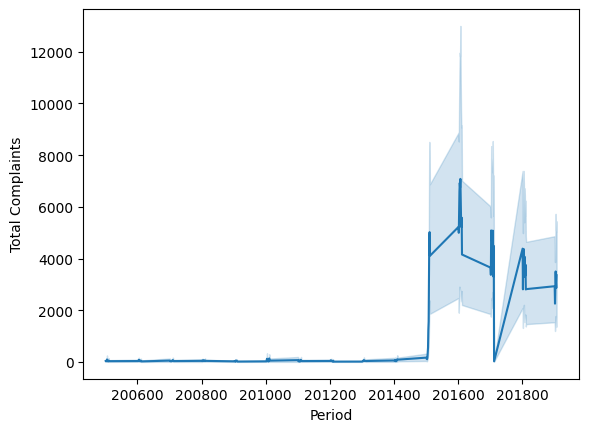

In [56]:
landing_df = raw_landing_df[["Activity Period", "Operating Airline IATA Code", "GEO Region", "Landing Aircraft Type", "Aircraft Body Type", "Aircraft Model", "Landing Count"]]\
    .rename(columns={"Activity Period": "Period", "Operating Airline IATA Code": "Airline", "GEO Region": "From", "Landing Aircraft Type": "Type", "Aircraft Body Type": "Body", "Aircraft Model": "Model"})\
    .query("Period <= 201907")
noise_df = raw_noise_df[["Period", "Community", "Total Complaints"]]
sns.lineplot(noise_df, x="Period", y="Total Complaints")

<AxesSubplot: xlabel='Period', ylabel='Total Complaints'>

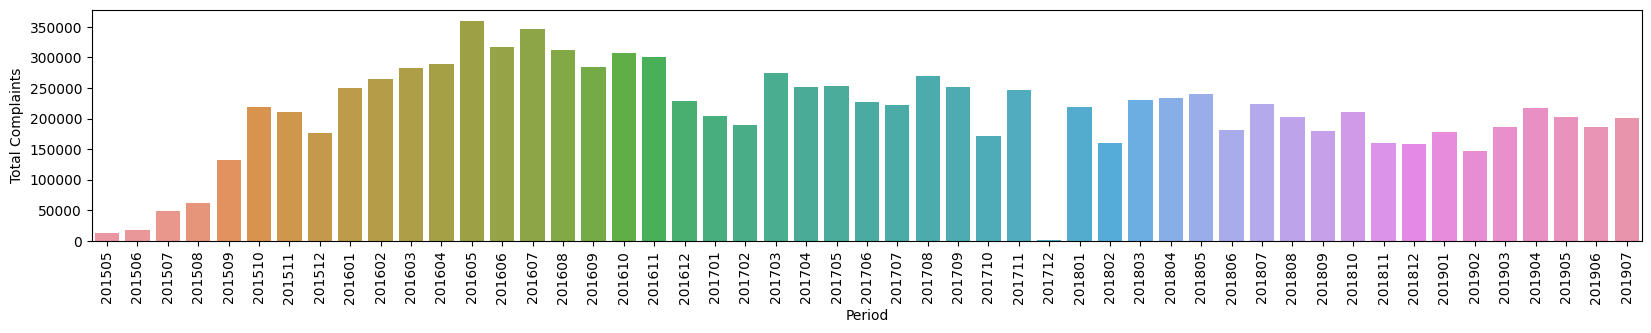

In [57]:
plt.figure(figsize=(20, 3))
plt.xticks(rotation=90)
sns.barplot(noise_df.groupby("Period", as_index=False).sum("Total Complaints").query("Period > 201504"), x="Period", y="Total Complaints")

<AxesSubplot: xlabel='Period', ylabel='Landing Count'>

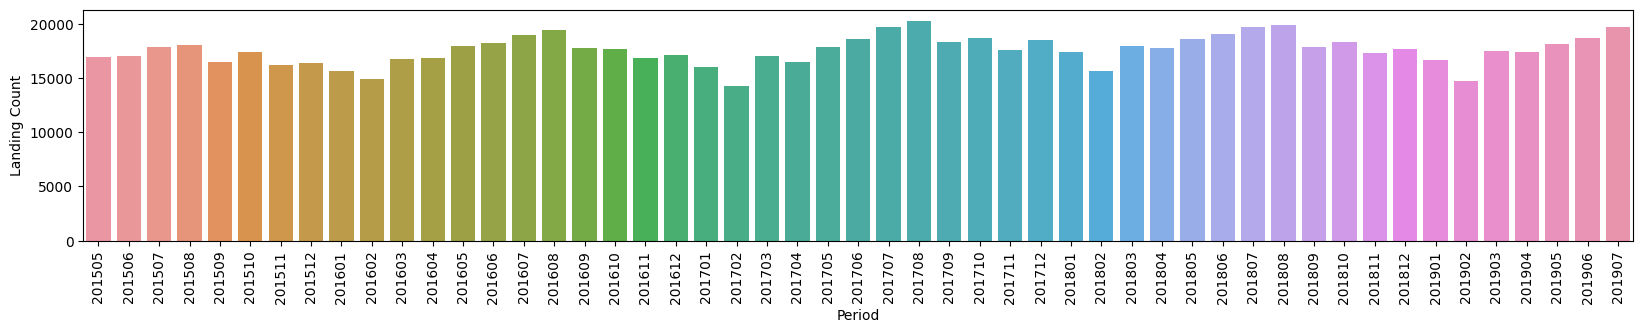

In [58]:
landing_df = landing_df.query("Period > 201504")
noise_df = noise_df.query("Period > 201504")
complaints_over_periods_df = noise_df.groupby("Period", as_index=False).sum("Total Complaints")
plt.figure(figsize=(20, 3))
plt.xticks(rotation=90)
sns.barplot(landing_df[["Period", "Landing Count"]].groupby("Period", as_index=False).sum(), x="Period", y="Landing Count")


In [59]:
data = complaints_over_periods_df.sort_values(by=["Period"], ascending=False)
def period_totalcomplaints_horizontal_barplot(ax):
    #sns.barplot(data, x="Total Complaints", y="Period", ax=ax, orient="h", color='green').set(ylabel=None)
    #ax.set_yticks(ax.get_yticks()+0.5)
    ax.barh([i for i in range(len(data["Period"]))], data["Total Complaints"], align="edge", color="green")
    #ax.barh("Period", "Total Complaints", align="edge", color="green", data=data)
    #ax.set(ylabel=data["Period"])

def pivot_with_complaints(pivot):
    fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[1.3, 1], sharey=True, gridspec_kw={"wspace":0})
    fig.set_size_inches(17, 9)
    sns.heatmap(pivot, ax=ax1, cbar_kws={"location":"left", "pad":0.18}, robust=True, linewidths=0.02, linecolor="black")
    period_totalcomplaints_horizontal_barplot(ax2)
    #ax2.barh(pivot.index, data["Total Complaints"], align="edge", color="green")

def landing_column_heatmap_with_complaints(col, filter_arr=None):
    data = landing_df[["Period", col, "Landing Count"]]
    if filter_arr is not None:
        data = data.query(f"{col} in {filter_arr}")
    pivot_with_complaints(data.groupby(["Period", col], as_index=False).sum().pivot(index="Period", columns=col, values="Landing Count"))

<AxesSubplot: xlabel='Airline', ylabel='Period'>

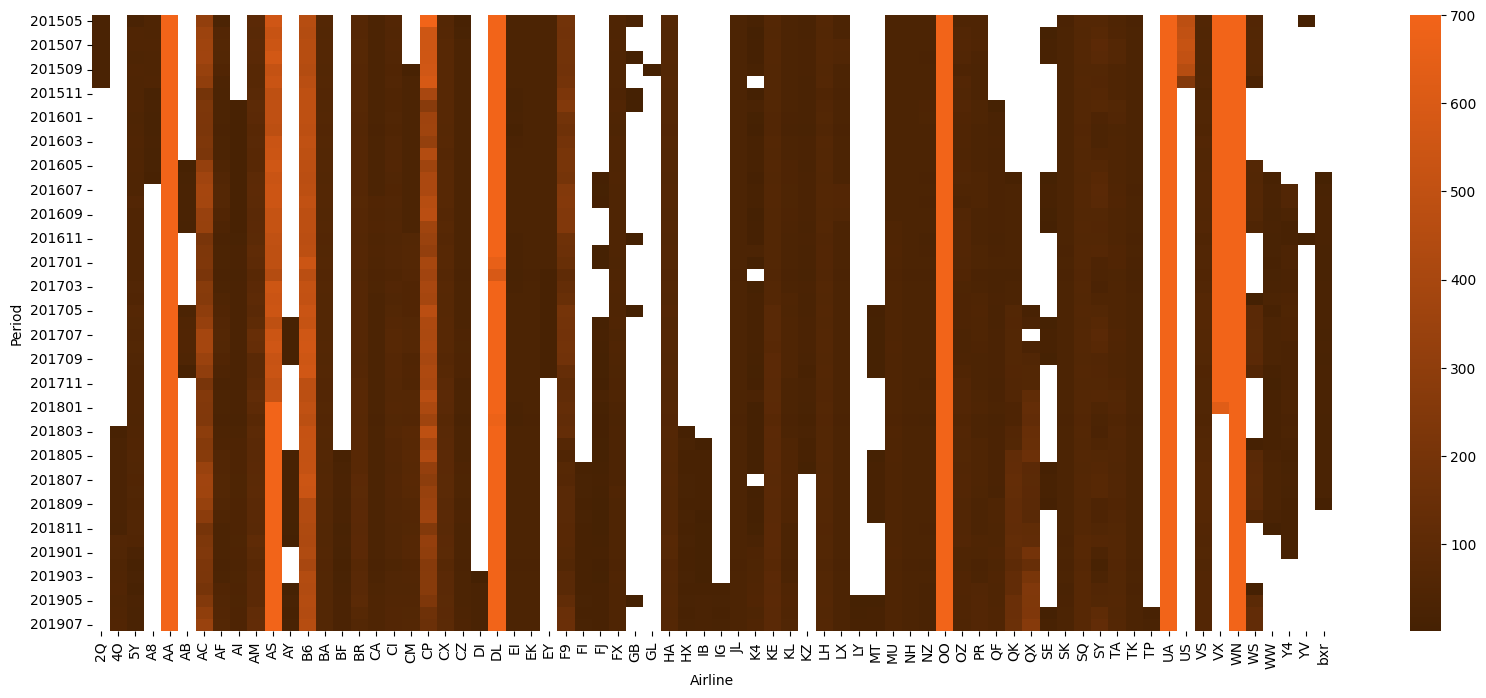

In [60]:
airline_pivot = \
    landing_df[["Period", "Airline", "Landing Count"]].groupby(["Period", "Airline"], as_index=False).sum()\
        .pivot(index="Period", columns="Airline", values="Landing Count")

plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.heatmap(airline_pivot, vmax=700, cmap=sns.blend_palette(["#452103", "#F26419"], as_cmap=True))

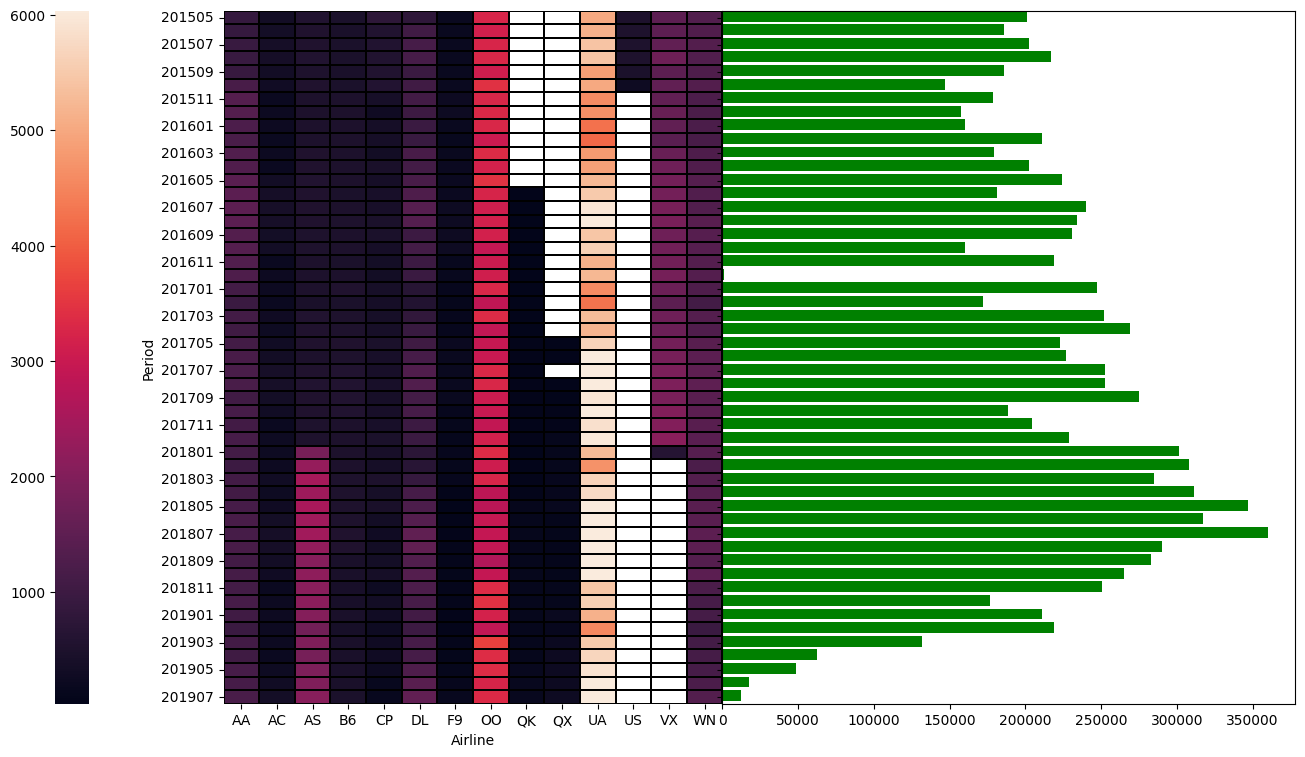

In [61]:
landing_column_heatmap_with_complaints("Airline", ["AA", "AC", "AS", "B6", "CP", "DL", "F9", "OO", "QK", "QX", "UA", "US", "VX", "WN"])

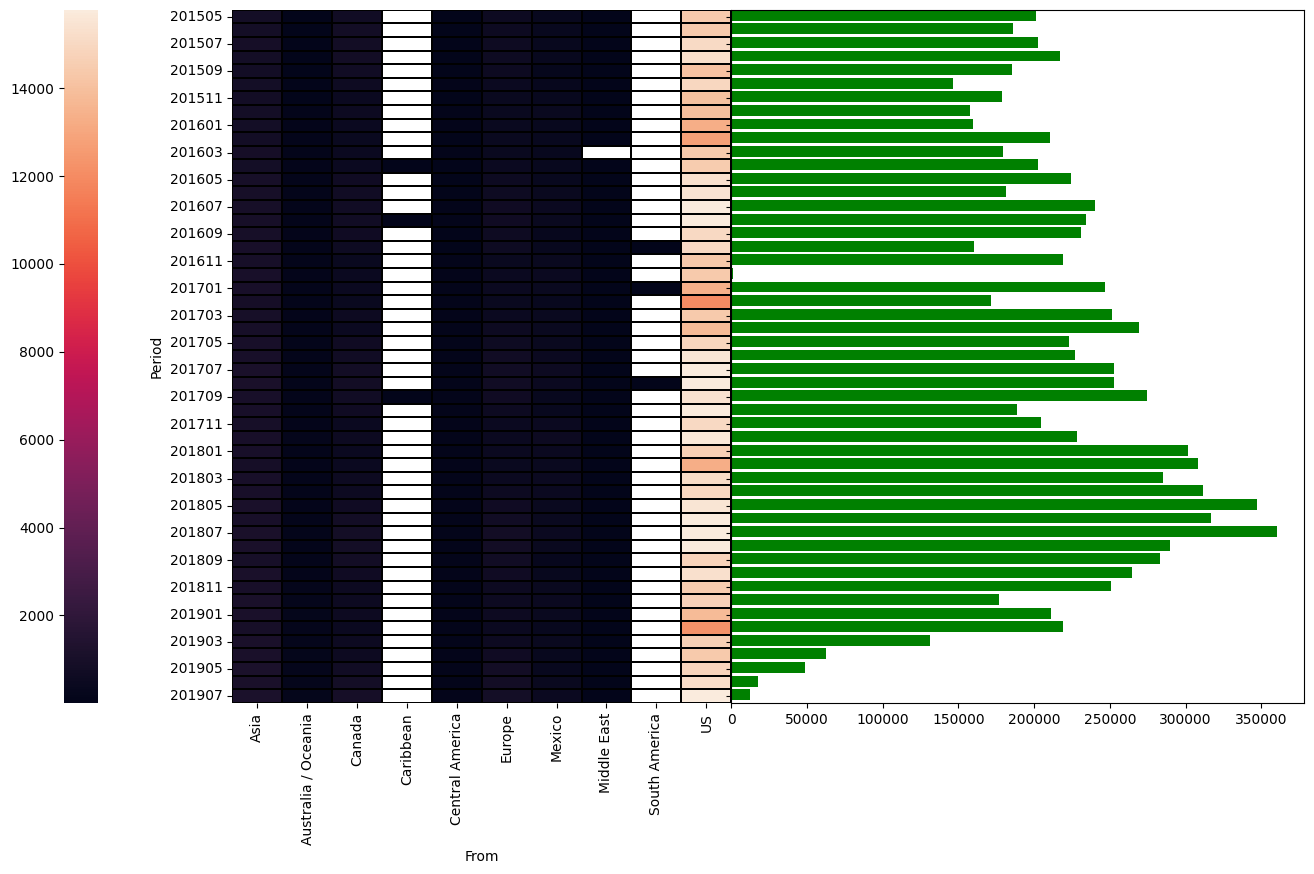

In [62]:
landing_column_heatmap_with_complaints("From")

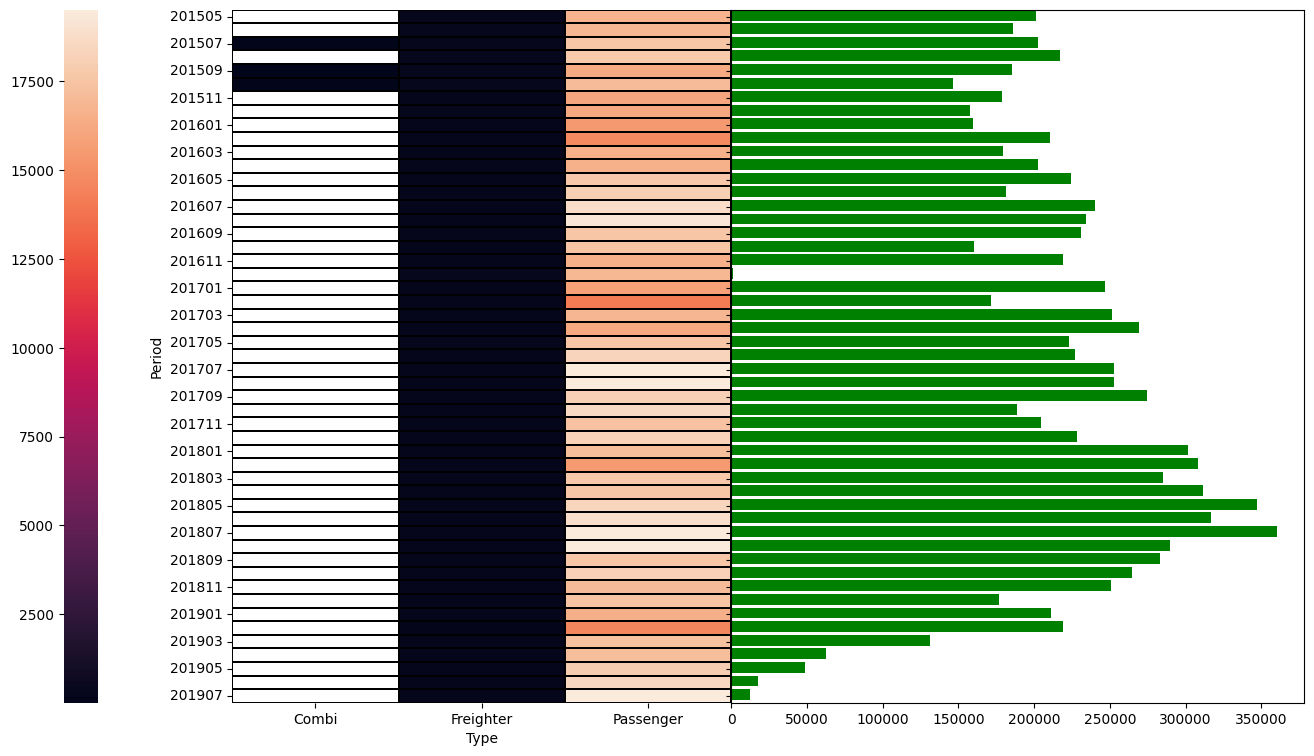

In [63]:
landing_column_heatmap_with_complaints("Type")

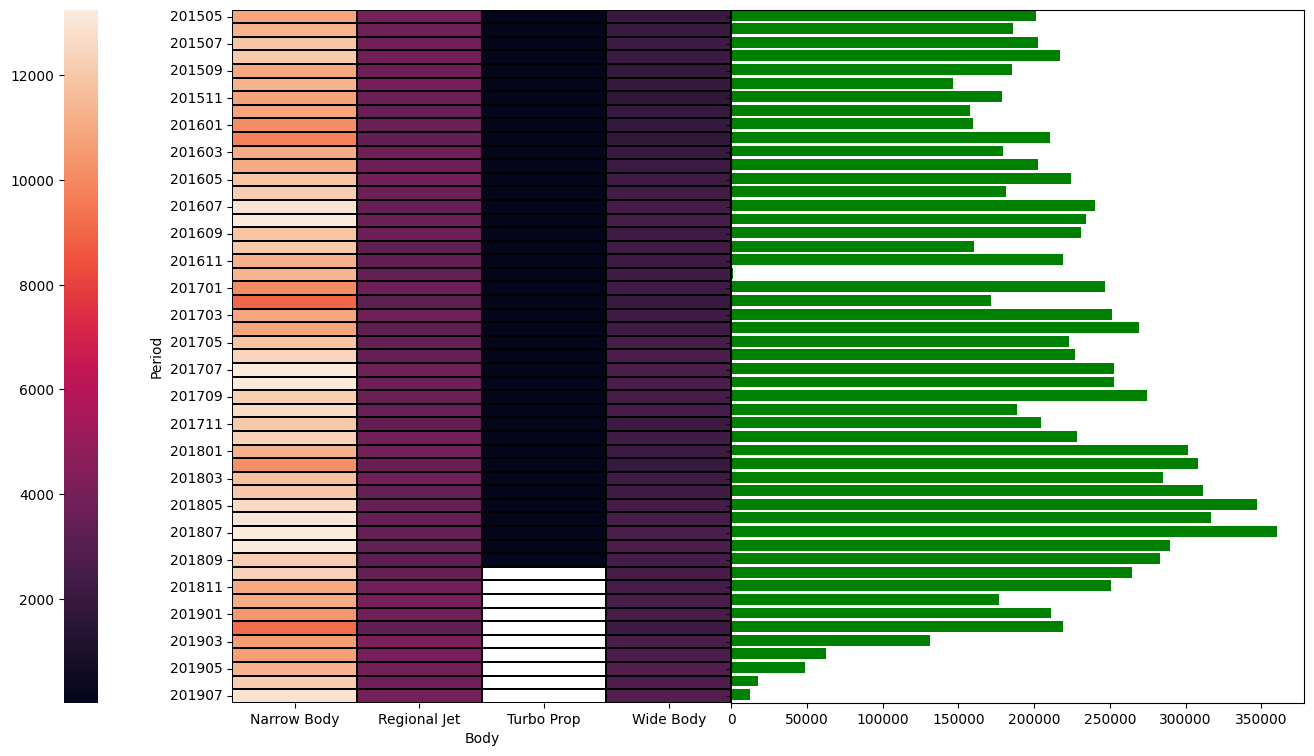

In [64]:
landing_column_heatmap_with_complaints("Body")

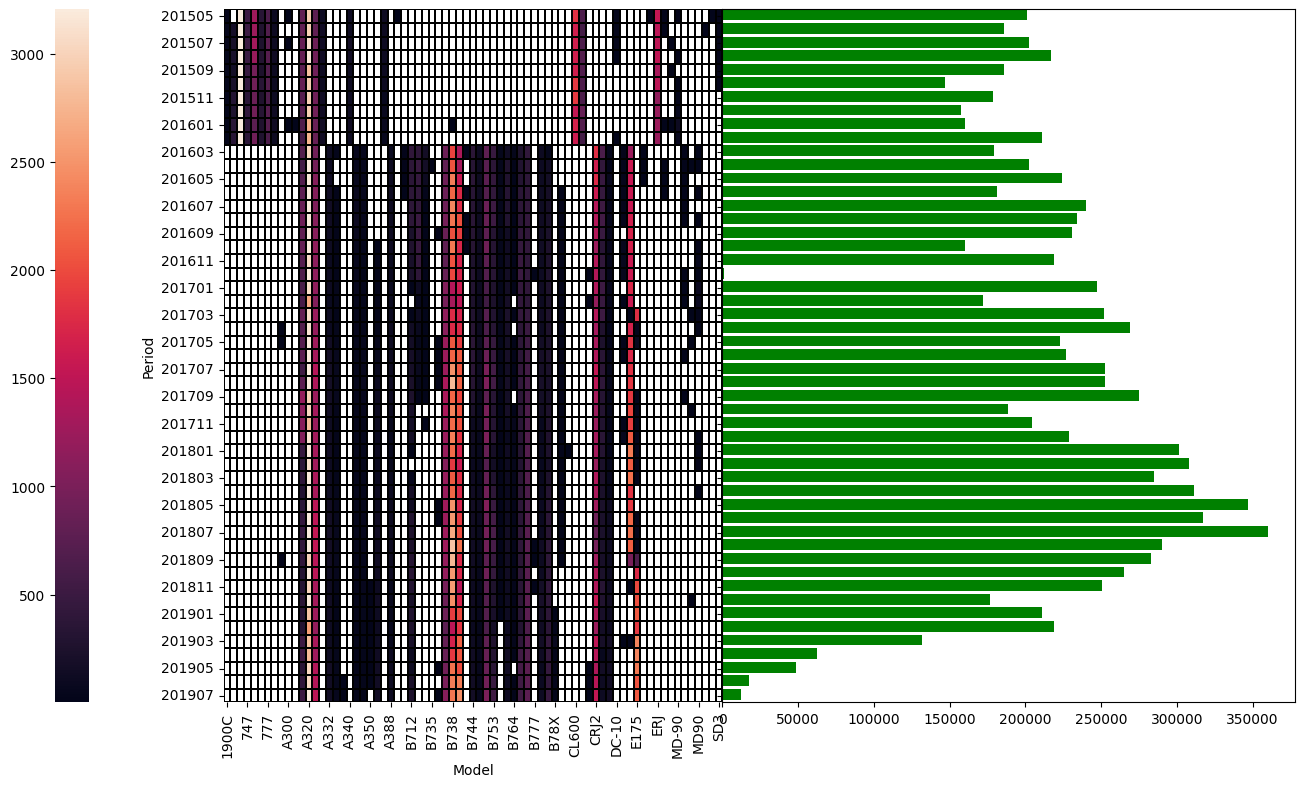

In [65]:
landing_column_heatmap_with_complaints("Model")